In [1]:
%pip install ipympl

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

  Using cached ipympl-0.9.1-py2.py3-none-any.whl (508 kB)
  Using cached ipywidgets-7.7.0-py2.py3-none-any.whl (123 kB)
  Using cached widgetsnbextension-3.6.0-py2.py3-none-any.whl (1.6 MB)
  Using cached notebook-6.4.11-py3-none-any.whl (9.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
dataset=pd.read_csv("D:/Obsidian_02/Combined_All/Sem_04_Notes/PAS/SCE_Customer_Segmentation/Machine-learning-without-any-libraries/2.Clustering/1.K_Means_Clustering/Mall_Customers.csv")
dataset.describe()
print(dataset)

     CustomerID  Gender  Age  Annual_Income  Spending_Score
0             1    Male   19             15              39
1             2    Male   21             15              81
2             3  Female   20             16               6
3             4  Female   23             16              77
4             5  Female   31             17              40
..          ...     ...  ...            ...             ...
195         196  Female   35            120              79
196         197  Female   45            126              28
197         198    Male   32            126              74
198         199    Male   32            137              18
199         200    Male   30            137              83

[200 rows x 5 columns]


In [8]:
dataset['Gender'].replace('Female',0,inplace=True)
dataset['Gender'].replace('Male',1,inplace=True)

In [9]:
X = dataset.iloc[:, 2: ].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

Now X is two matrix of shape (200,3)

In [10]:
m=X.shape[0] #number of training examples 
n=X.shape[1] #number of features. Here n=3
n_iter=1000
print(n)
X.shape

3


(200, 3)

In [11]:
K=5 # number of clusters

In [12]:
Centroids=np.array([]).reshape(n,0) 

In [13]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
    print(Centroids)
# new_Centroids = Centroids

[[42.]
 [34.]
 [17.]]
[[42. 32.]
 [34. 77.]
 [17. 74.]]
[[42. 32. 40.]
 [34. 77. 71.]
 [17. 74. 95.]]
[[42. 32. 40. 32.]
 [34. 77. 71. 48.]
 [17. 74. 95. 47.]]
[[42. 32. 40. 32. 31.]
 [34. 77. 71. 48. 40.]
 [17. 74. 95. 47. 42.]]


In [14]:
Output={}

In [15]:
for i in range(n_iter):
	#step 2.a
	EuclidianDistance=np.array([]).reshape(m,0)
	for k in range(K):
		tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
		EuclidianDistance=np.c_[EuclidianDistance,tempDist]
	C=np.argmin(EuclidianDistance,axis=1)+1
	print(C)  
	 #step 2.b
	Y={}
	for k in range(K):
		Y[k+1]=np.array([]).reshape(n,0)
	for i in range(m):
		Y[C[i]]=np.c_[Y[C[i]],X[i]]   #Column concatenate
	 
	for k in range(K):
		Y[k+1]=Y[k+1].T  #Transpose of the matrix
	
	for k in range(K):
		Centroids[:,k]=np.mean(Y[k+1],axis=0)
		Output=Y
		# new_Centroids = Centroids
	
	print(Centroids)

[5 5 1 5 5 5 1 3 1 5 1 3 1 5 1 5 5 5 1 3 5 5 1 5 1 4 1 5 1 4 1 4 1 3 1 4 1
 4 1 4 1 3 5 4 1 4 4 5 5 5 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 2 4 2 2 4 2 3 4 2 4 3 1 2 1 2 4 2 1 3 1 2 1 2 1 3 4 3 4 3 4 2
 4 3 4 3 4 2 1 2 1 2 1 2 4 2 1 3 4 2 4 3 4 2 4 2 1 3 1 2 1 2 1 2 2 2 4 2 2
 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[45.625      35.05       31.64705882 41.4673913  29.21052632]
 [49.90625    92.3        63.58823529 57.15217391 25.47368421]
 [13.0625     63.3        93.         48.01086957 57.47368421]]
[5 5 1 5 5 5 1 5 1 5 1 5 1 5 1 5 5 5 1 5 5 5 1 5 1 5 1 5 1 5 1 5 1 3 1 5 1
 5 1 5 1 3 4 5 1 5 4 5 5 4 4 5 5 4 4 4 4 4 4 4 4 5 4 4 4 5 4 4 5 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 4 3 1 3 1 3 4 2 1 3 1 2 1 2 1 3 4 3 1 3 4 2
 1 3 1 3 1 2 1 3 1 3 1 2 4 3 1 3 4 2 1 3 2 2 1 2 1 3 1 2 1 2 1 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [16]:
print(Centroids)

[[45.2173913  40.66666667 32.69230769 43.72727273 24.96      ]
 [26.30434783 87.75       86.53846154 55.48051948 28.04      ]
 [20.91304348 17.58333333 82.12820513 49.32467532 77.        ]]


In [17]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF']
df = pd.read_csv('./Mall_Customers.csv')
# kmeans = KMeans(n_clusters=3, random_state=0)
# df['Age'] = kmeans.fit_predict(df[['Attack', 'Defense', 'HP']])
df['cluster'] = C
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Age, df.Annual_Income, df.Spending_Score, c=df.c, s=15)
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './Mall_Customers.csv'

In [18]:
colors = ['red', 'blue', 'green','pink','yellow']
dataset['cluster']=C
dataset['c'] = dataset.cluster.map({1:colors[0], 2:colors[1], 3:colors[2],4:colors[3],5:colors[4]})
print(dataset)

     CustomerID  Gender  Age  Annual_Income  Spending_Score  cluster       c
0             1       1   19             15              39        1     red
1             2       1   21             15              81        5  yellow
2             3       0   20             16               6        1     red
3             4       0   23             16              77        5  yellow
4             5       0   31             17              40        1     red
..          ...     ...  ...            ...             ...      ...     ...
195         196       0   35            120              79        3   green
196         197       0   45            126              28        2    blue
197         198       1   32            126              74        3   green
198         199       1   32            137              18        2    blue
199         200       1   30            137              83        3   green

[200 rows x 7 columns]


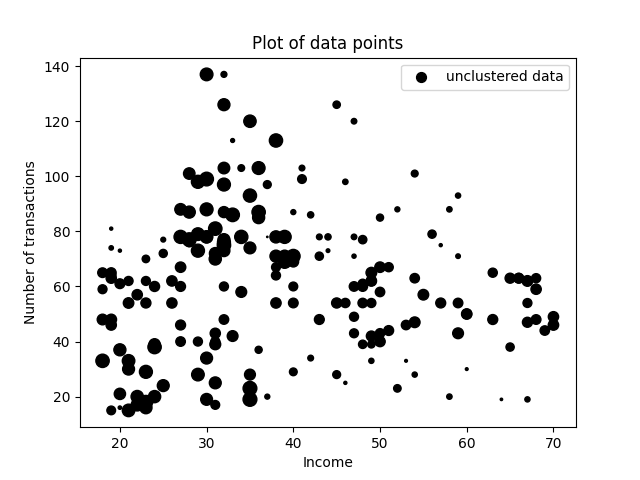

In [19]:
# colors = ['#DF2020', '#81DF20', '#2095DF']
plt.scatter(X[:,0],X[:,1],X[:,2],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

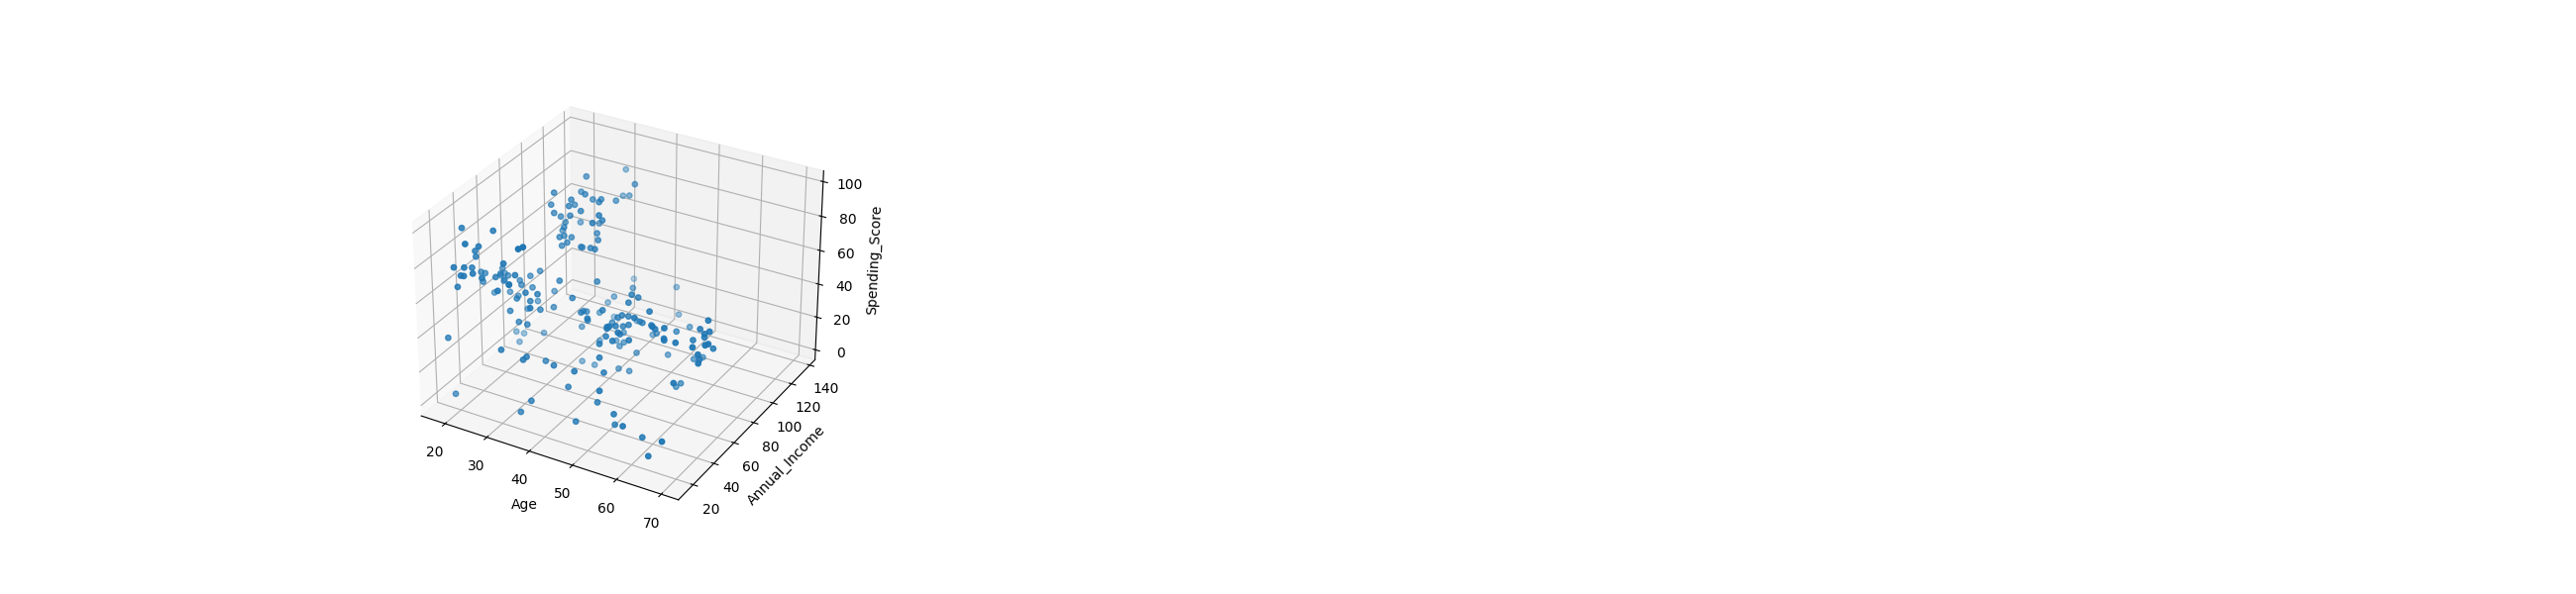

In [21]:
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(dataset.Age,dataset.Annual_Income, dataset.Spending_Score, s=15)
ax.set_xlabel('Age')
ax.set_ylabel('Annual_Income')
ax.set_zlabel('Spending_Score')
plt.show()

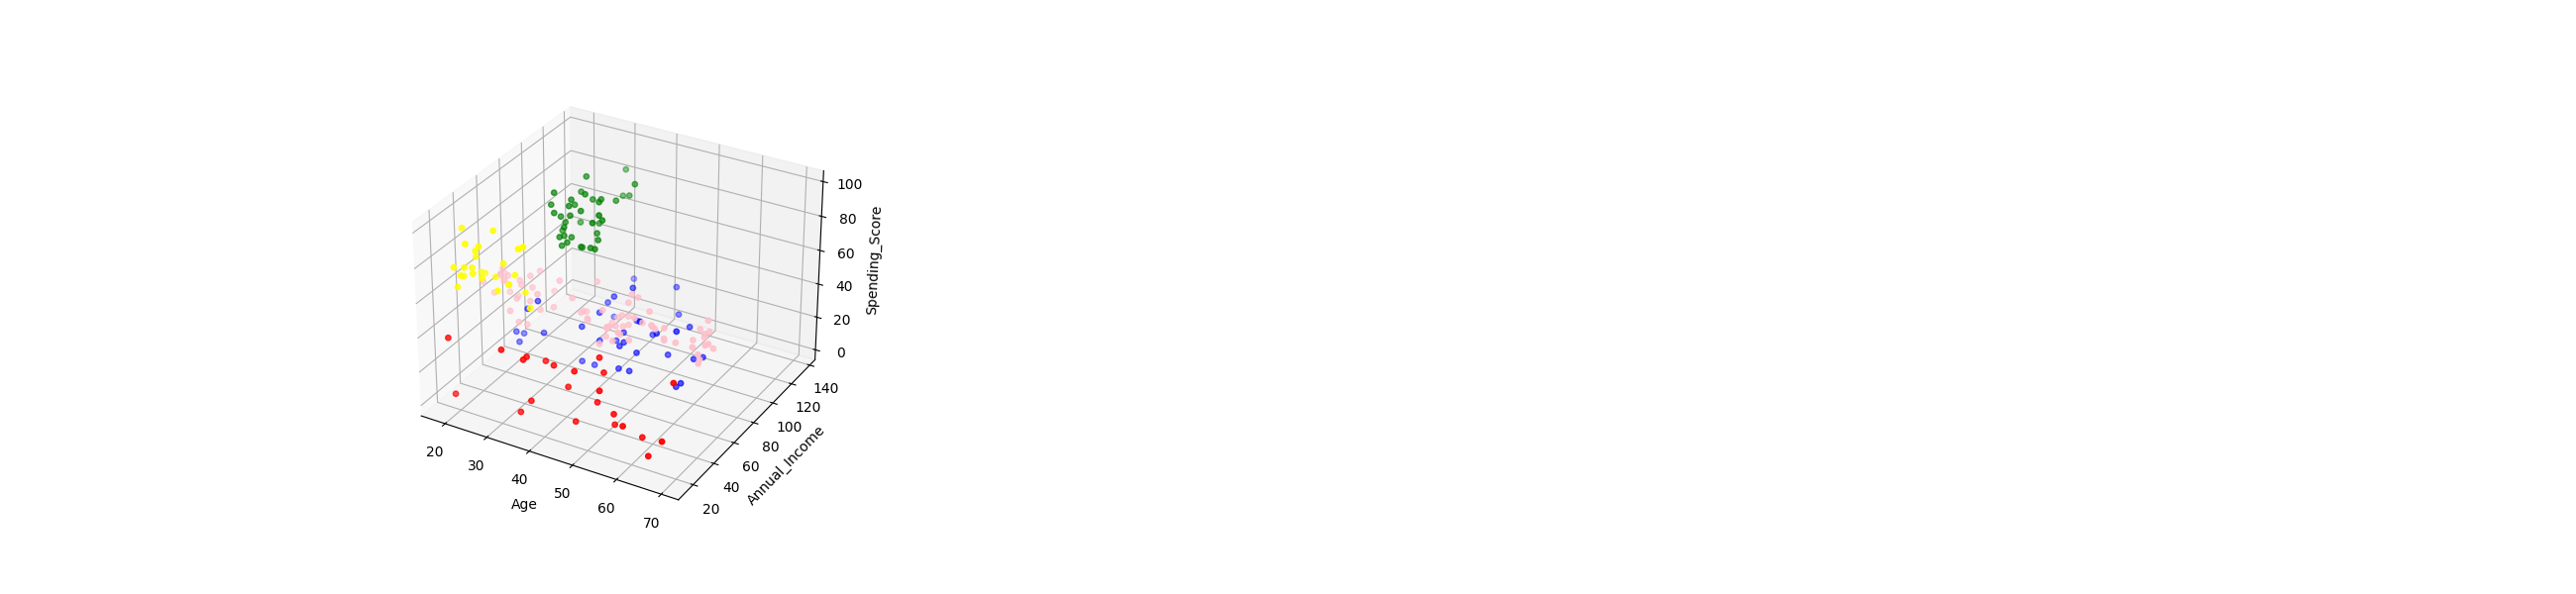

In [20]:
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(dataset.Age,dataset.Annual_Income, dataset.Spending_Score, c=dataset.c, s=15)
ax.set_xlabel('Age')
ax.set_ylabel('Annual_Income')
ax.set_zlabel('Spending_Score')
plt.show()

In [19]:
from google.colab import output
output.enable_custom_widget_manager()

In [20]:
from google.colab import output
output.disable_custom_widget_manager()

In [17]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()

ValueError: ignored